In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("Titanic_train.csv")

In [4]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S


In [5]:
# dropping unwanted columns
df.drop(["PassengerId",'Ticket','Cabin','Name'],axis=1, inplace=True)

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.duplicated().sum()

np.int64(111)

In [10]:
df= df.drop_duplicates()

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
#imputing the missing values  
df["Age"] = df.groupby(["Sex","Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

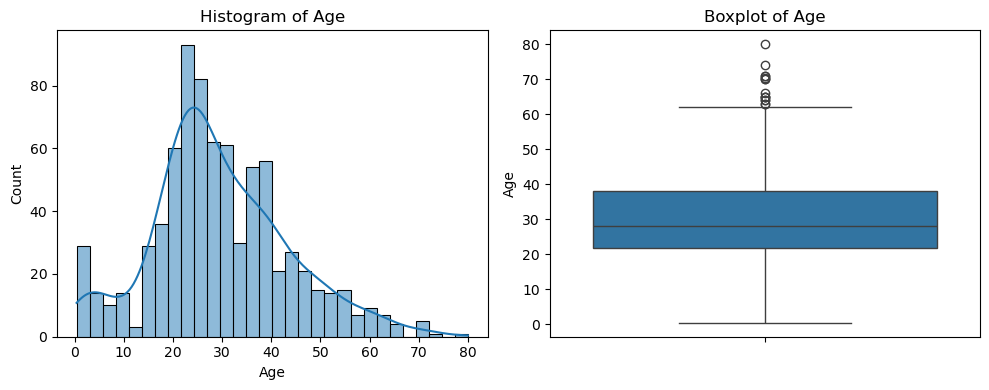

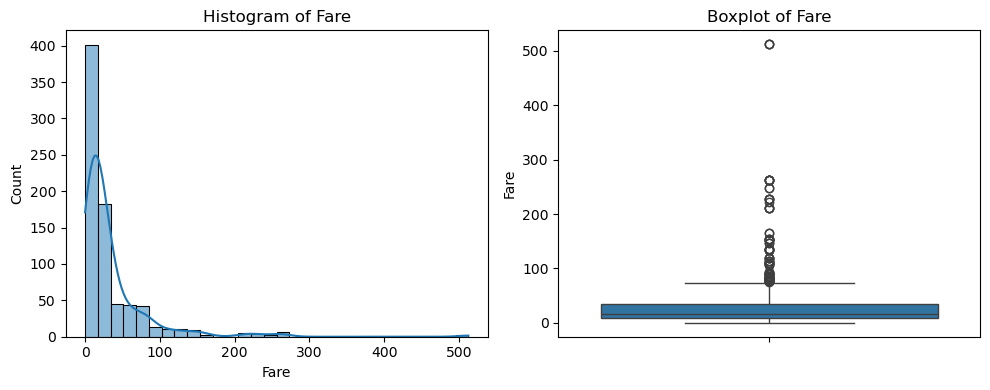

In [14]:
# visiulising the interger coulunts using box plot and histogram 

for i in ["Age","Fare"]:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')

    plt.tight_layout()
    plt.show()

In [15]:
# making list of catogorical colums 

cat_col=df.drop(["Age","Fare"], axis=1)

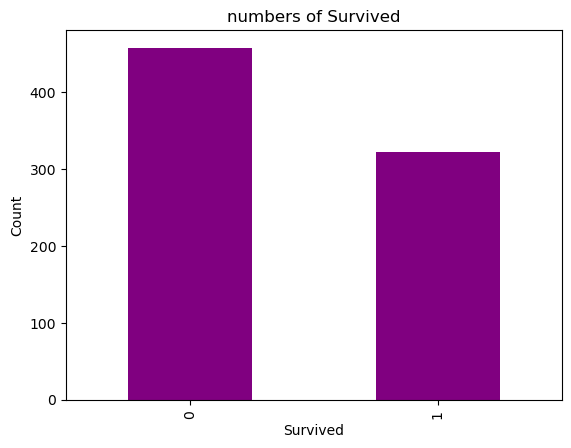

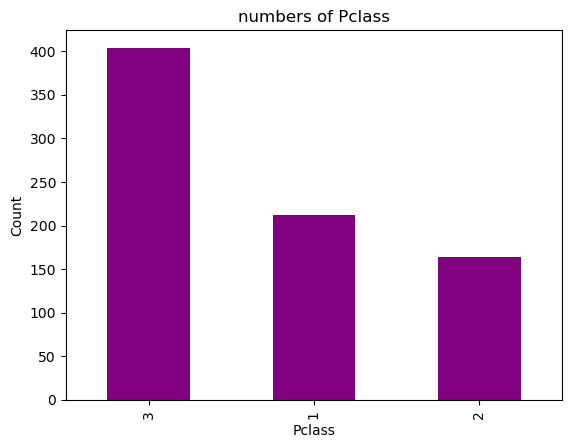

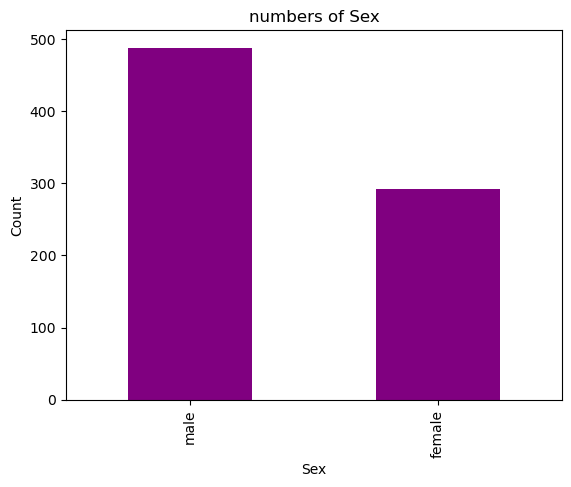

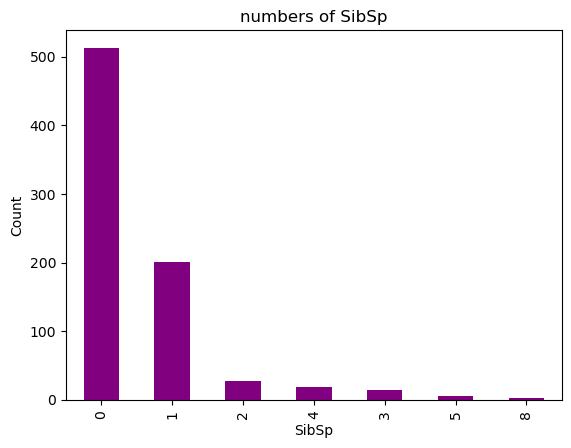

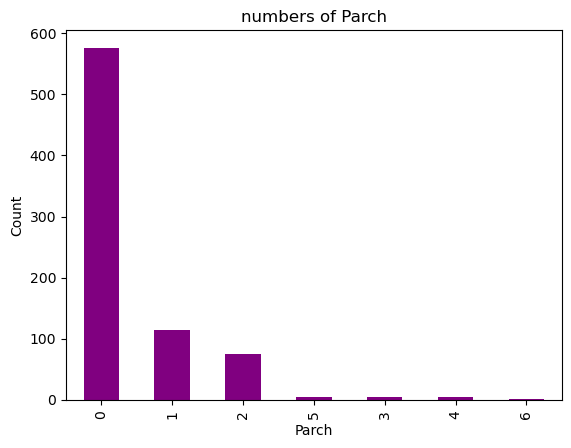

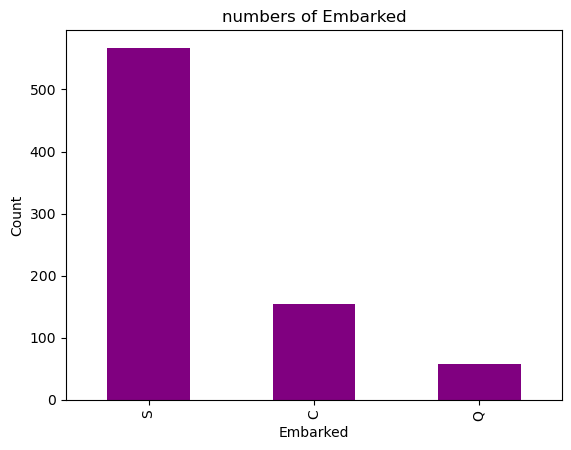

In [16]:
 # Barcharts for every catogorical columns 

for cat in cat_col.columns:
        counts = df[cat].value_counts()
    
        # Plot vertical bar chart
        counts.plot(kind='bar', color='purple')
        plt.xlabel(cat)
        plt.ylabel("Count")
        plt.title(f"numbers of {cat}")
        plt.show()

In [17]:
df= pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True, dtype= int )

In [18]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,22.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [19]:
# chekcing correlation between interger value 

df[["Age", "Fare"]].corr()

,Age,Fare
Age,1.000000,0.113691
Fare,0.113691,1.000000


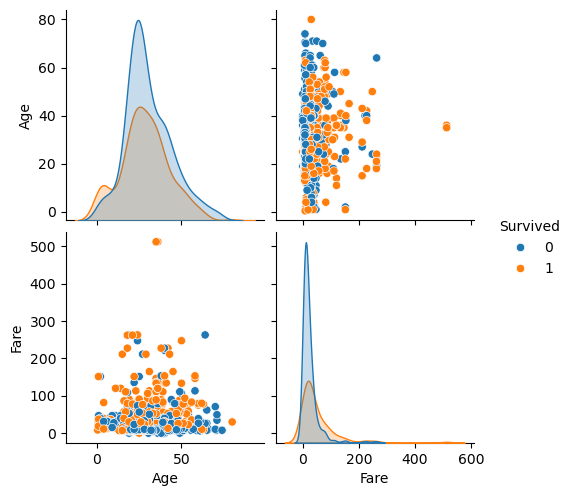

In [20]:
sns.pairplot(data=df, 
             vars=["Age", "Fare"],  
             hue="Survived")                
plt.show()

In [21]:
# Mddeling

In [22]:

X= df.drop("Survived",axis=1) # Features 
y= df["Survived"]  # Target variable

In [23]:
# importing maching learning module  and spliting the data into Test and Train dataset 
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# standardizing the data 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train) # fit_transfor is used for training ddata
X_test =scaler.transform(X_test) # tranform to traing data 


In [ ]:
# installing the require modules 

In [25]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install  xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [27]:
#Importing the boosting techniques 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [28]:
# Fitting light boosing to data set 
LG= LGBMClassifier( n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42)
LG.fit(X_train, y_train)
y_pred_LG = LG.predict(X_test)



[LightGBM] [Info] Number of positive: 257, number of negative: 367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 624, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411859 -> initscore=-0.356286
[LightGBM] [Info] Start training from score -0.356286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [29]:
# Fitting XG boosing to data set 

XG = XGBClassifier( n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42)
XG.fit(X_train,y_train)
y_pred_XG=XG.predict(X_test)

In [30]:
# Applying Metrics to evaluate the accuracy of the models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📈 {model_name} Evaluation:")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall   :", round(recall_score(y_true, y_pred), 3))
    print("F1 Score :", round(f1_score(y_true, y_pred), 3))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

In [31]:

evaluate_model(y_test, y_pred_LG, " LightGBM")
evaluate_model(y_test, y_pred_XG, " XGBoost")


📈  LightGBM Evaluation:
Accuracy : 0.801
Precision: 0.815
Recall   : 0.677
F1 Score : 0.739

Confusion Matrix:
[[81 10]
 [21 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        91
           1       0.81      0.68      0.74        65

    accuracy                           0.80       156
   macro avg       0.80      0.78      0.79       156
weighted avg       0.80      0.80      0.80       156


📈  XGBoost Evaluation:
Accuracy : 0.814
Precision: 0.821
Recall   : 0.708
F1 Score : 0.76

Confusion Matrix:
[[81 10]
 [19 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        91
           1       0.82      0.71      0.76        65

    accuracy                           0.81       156
   macro avg       0.82      0.80      0.80       156
weighted avg       0.81      0.81      0.81       156



In [32]:
# Comparing accuracy using Cross-Validation
 
lgb_cv = cross_val_score(LG, X, y, cv=5, scoring='accuracy')
xgb_cv = cross_val_score(XG, X, y, cv=5, scoring='accuracy')

print("\n🌿 LightGBM Mean CV Accuracy:", round(lgb_cv.mean(), 3))
print("🚀 XGBoost Mean CV Accuracy:", round(xgb_cv.mean(), 3))

[LightGBM] [Info] Number of positive: 258, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 624, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.413462 -> initscore=-0.349674
[LightGBM] [Info] Start training from score -0.349674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


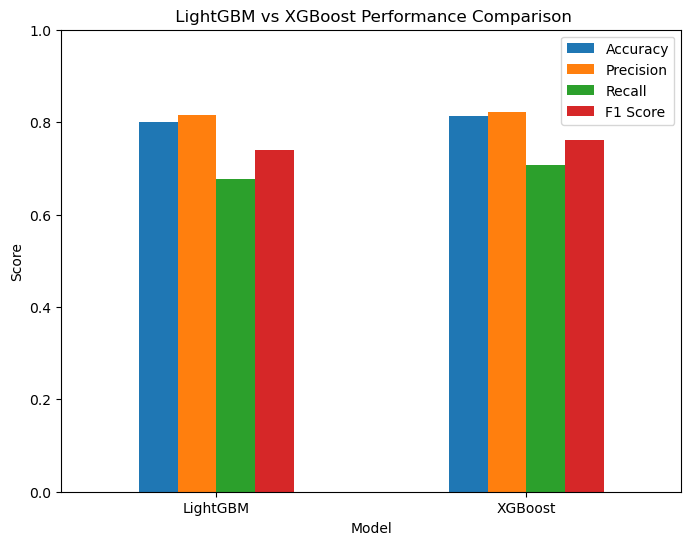

In [33]:
#  Visulazing the Comparision 
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_LG), accuracy_score(y_test, y_pred_XG)],
    'Precision': [precision_score(y_test, y_pred_LG), precision_score(y_test, y_pred_XG)],
    'Recall': [recall_score(y_test, y_pred_LG), recall_score(y_test, y_pred_XG)],
    'F1 Score': [f1_score(y_test, y_pred_LG), f1_score(y_test, y_pred_XG)]
})

results.set_index('Model').plot(kind='bar', figsize=(8,6))
plt.title(" LightGBM vs XGBoost Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

# About LightGBM

__LightGBM Strengths:__

Very fast training.

Excellent for large datasets.

Handles categorical variables automatically.

High accuracy potential.

__LightGBM Weaknesses:__

Can overfit on small data.

Requires more parameter tuning to balance performance.

# About XGBoost

__XGBoost Strengths:__

Stable and reliable results across datasets.

Lower overfitting risk due to level-wise tree building.

Strong community support and proven in many Kaggle competitions.

__XGBoost Weaknesses:__

Slower training than LightGBM.

Requires more memory.

Needs explicit encoding for categorical data.

# Conclusion 

> Use LightGBM when you need speed and scalability (e.g., large tabular data).

> Use XGBoost when you want stability, interpretability, and less risk of overfitting.